In [2]:
import sys
import os
sys.path.append(os.path.abspath('../quantum'))
import numpy as np
import matplotlib.pyplot as plt

#qiskit
from qiskit.providers.aer import Aer # call directly providers to avoid lazy loading of backend
from qiskit import QuantumCircuit, execute
from qiskit.quantum_info import state_fidelity, Statevector

# import basic plot tools
#import qiskit.visualization as vis
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import vector2latex
%matplotlib inline

# from quantum
import encoding as enc
import dist_calc as dist


## orthogonal and collinear real inputs

In [3]:
a11 = np.array([1,1])
a1_1 = np.array([1,-1])
a_11 = np.array([-1,1])
a_1_1 = np.array([-1,-1])

## dist calc with lloyd approach

### 90deg vectors (1,1) vs (1,-1)

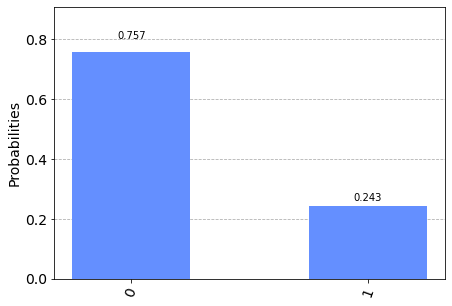

In [4]:
qc = dist.overlap_circuit(a11, a1_1)
counts = dist.run_circuit(qc)
plot_histogram(counts)

In [5]:
dist.calc_dist(counts, dist.calc_z(a11, a1_1))

4.112000000000001

### inverse vectors (1,-1) vs (-1,1) 

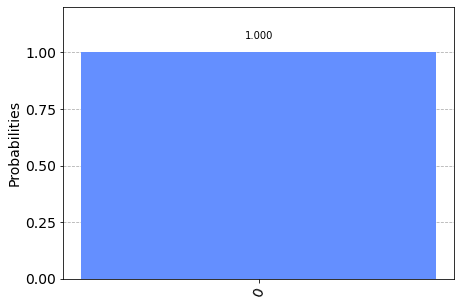

In [6]:
qc = dist.overlap_circuit(a1_1, a_11)
counts = dist.run_circuit(qc)
plot_histogram(counts)

In [7]:
dist.calc_dist(counts, dist.calc_z(a1_1, a_11))

8.000000000000002

### same vectors (-1,-1) vs (-1,-1) 

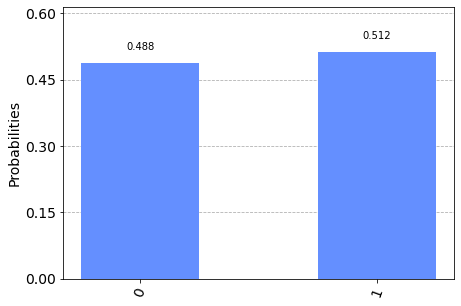

In [8]:
qc = dist.overlap_circuit(a_1_1, a_1_1)
counts = dist.run_circuit(qc)
plot_histogram(counts)

In [9]:
dist.calc_dist(counts, dist.calc_z(a_1_1, a_1_1))

0.19200000000000023

# random input vectors [-1,1]

In [10]:
# calculate overlaps for different input vectors
dists_q = []
dists_eucl = []
vectors = []
sz = 8
min_val = -1
max_val = 1
v = np.random.uniform(low=min_val, high=max_val, size=sz)
for i in range(int(1e4)):
        w = np.random.uniform(low=min_val, high=max_val, size=sz)
        # calc quantum dist 
        qc = dist.overlap_circuit(v, w)
        counts = dist.run_circuit(qc)
        dists_q.append(dist.calc_dist(counts, dist.calc_z(v, w)))
        # calc euclidian dist
        dists_eucl.append(np.linalg.norm(v-w))
        vectors.append((v,w))

In [11]:
plt.style.use('seaborn-whitegrid')

Text(0, 0.5, 'quantum distance')

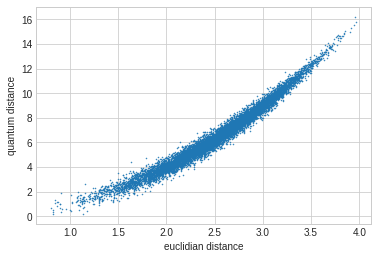

In [12]:
# plot results
d_eucl_srtd, d_q_srtd, vectors_srtd = zip(*sorted(zip(dists_eucl, dists_q, vectors)))
plt.scatter(d_eucl_srtd, d_q_srtd, marker='.', s=1)
# plt.hist2D
# profile plot: mean +/- err
# matplotlib.hep tprofile
plt.xlabel('euclidian distance')
plt.ylabel('quantum distance')

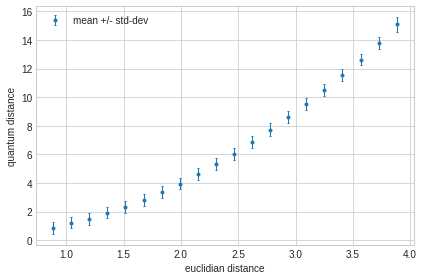

In [13]:
import scipy.stats
fig_dir = '../fig/generic'
x = np.array(d_eucl_srtd)
y = np.array(d_q_srtd)
means_result = scipy.stats.binned_statistic(x, [y, y**2], bins=20, range=(d_eucl_srtd[0],d_eucl_srtd[-1]), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = np.sqrt(means2 - means**2)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

fig = plt.figure()
plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, elinewidth=1., linestyle='none', marker='.', capsize=1, label='mean +/- std-dev')
plt.xlabel('euclidian distance')
plt.ylabel('quantum distance')
plt.legend(loc='best')
plt.tight_layout()
fig.savefig(fig_dir+'/qdist_calc_err.png')

In [14]:
!pwd

/home/kinga/mnt6/laspaclu/playground
